# Monte Carlo Simulation

## Introduction

Monte Carlo simulations perform a simulation of a large number of experiments and determine the ratio of successes to the overall number.  These experiments are stochastic, e.g. they can have different outcomes and the outcomes are distributed randomly among all the possible outcomes according to some distribution function.  So, if we run N experiments, and observe how many times a particular outcome of interest is observed M, so can estimate that the probability of that outcome occurring.

## Experiment

The intial libraries needed as well as the final variables which will be used throughout the code a default values

In [1]:
import random
import math as m
DAYS = 365
GROUP_SIZE = 23

In the below code, there is a set up for making the list of random birthdays for each person in a total set of 23 people

In [2]:
list = []
for i in range(0,GROUP_SIZE):
    list.append(random.randint(1,DAYS))


Then there is a simulated test to show the chances of all birthdays below in the list colliding with one another

In [3]:
print ("Birthdays: "+str(list))
def collision_check():
    collision=0
    for i in range(len(list)):
        for j in range(len(list)):
            if i != j:
                if list[i] == list[j]:
                    collision+=1
                    print(f"Birthday {list[i]} of person {i} is equal to Birthday {list[j]} of person {j}.")
collision_check()

Birthdays: [348, 11, 209, 185, 107, 103, 82, 54, 229, 2, 175, 243, 35, 123, 35, 2, 266, 229, 278, 216, 101, 134, 39]
Birthday 229 of person 8 is equal to Birthday 229 of person 17.
Birthday 2 of person 9 is equal to Birthday 2 of person 15.
Birthday 35 of person 12 is equal to Birthday 35 of person 14.
Birthday 35 of person 14 is equal to Birthday 35 of person 12.
Birthday 2 of person 15 is equal to Birthday 2 of person 9.
Birthday 229 of person 17 is equal to Birthday 229 of person 8.


*As can be seen there are quite a few collisions so a good guess would be that there is a high probability of these birthdays crossing over.* **This probability can be calculated**


### Mathematics

**The following mathematical equation was used in order to convert said variables into a probability statistic**

In [4]:
Probability = 0
def Calc(DAYS,GROUP_SIZE):
    Vnr = (m.factorial(DAYS))/(m.factorial(DAYS-GROUP_SIZE))
    Vt = m.pow(DAYS,GROUP_SIZE)
    return Vnr/Vt
def Convert(calculation):
    conversion = 1-(calculation)
    return str(round(conversion*100,2))
    
calculation = Calc(DAYS,GROUP_SIZE)
Probability = Convert(calculation)
print(Probability)

50.73


**Above** shows the calculation involved with the group size and the birthday range. *Uses of factorial over factorial and then converted to a percent*

### Simulation

A function that calculates the group size that is the smallest group size to have a probability of greater than 50% that two people share the same birthday.
*Adjust G for the size of group and adjust N to adjust the number of simulations*
**MAX SIZE FOR G is 120**

In [5]:
%%time
#Group size Var
G = 120
#Number of simulations
N = 50

def probability_sim(G,N):
    '''Simulates a Monte Carlo simulation taking in a group size (G) and a number of simulations (N)'''
    while(N>=0):
        #print("Run: "+str(r))
        P = Convert(Calc(DAYS,G))
        N-=1
    print("The probability of a group size "+str(G)+" having a common birthday is "+str(P)+"%")
probability_sim(G,N)

The probability of a group size 120 having a common birthday is 100.0%
CPU times: total: 0 ns
Wall time: 0 ns


This function calculates the group size that is the smallest group size to have a probability of greater than 50% that two people share the same birthday. **This function returns the group size as well as the number of iteration from 120 people to reach the desired group size.**

In [6]:
%%time
GROUP_MAX_SIZE = 120
def group_estimation(GROUP_MAX_SIZE):
        counter = 0
        while(float(Convert(Calc(DAYS,GROUP_MAX_SIZE)))>50):
            GROUP_MAX_SIZE-=1
            counter+=1
        print("Smallest group size to remain above 50%: "+str(GROUP_MAX_SIZE+1)+" people")
        print("Iterations from group size of 120 people to reach desired group: "+ str(counter))
      
group_estimation(GROUP_MAX_SIZE)

Smallest group size to remain above 50%: 23 people
Iterations from group size of 120 people to reach desired group: 98
CPU times: total: 0 ns
Wall time: 999 µs


## Benchmarking 

Below is marked the benchmarking of the primary laptop and using Rosie in comparison utilizing the group minimum estimation shown earlier to give out data in a set amount of time. This benchmark checks max group size while allowing changes in simulation runs. For the sake of linear benchmarking, this will be purely measured at 1000 runs at a group size of 120.

In [7]:
%%time
MAX_VALUE = 120
N = 1000
probability_sim(MAX_VALUE,N)
print(probability_sim.__doc__)


The probability of a group size 120 having a common birthday is 100.0%
Simulates a Monte Carlo simulation taking in a group size (G) and a number of simulations (N)
CPU times: total: 15.6 ms
Wall time: 11 ms


----------------------------------------------------------------------------------------------------------------------------------------------------------------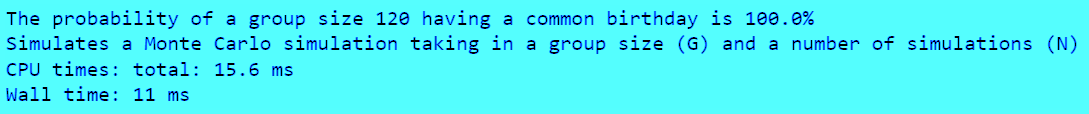 ------------------------------------------------------------- **Above is the laptop runtime** -------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------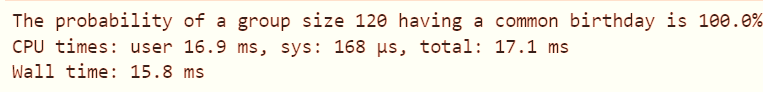 ------------------------------------------------------------- **Above is the Rosie runtime** -------------------------------------------------------------

As can be seen below, the laptop generally had better handling of the task as it clocked significantly less time than Rosie, Both CPU and Wall times on the laptop were lower. Therefore, **The laptop was a better choice for running this proccess.**

## Conclusion

1.What is the probability of a group of size 20 that at least one pair has the same birthday?

**The probability of a group size of 20 having at least on pair of the same birthday is 41.14%. This was found using the simulation code above to approximate the probability.**

2.What is the smallest group size to have a probability of greater than 50% that two people share the same birthday?

**The smallest group size to have a probability greater than 50% would be a group of 23 people. This was found using the code for the estimator above. This is the ideal group size before it would be considered likely that their birthdays would match.**

3.How large of an N is necessary to provide confidence in your answer?
**An N value of about 1000 is necessary to provide confidence to my answer because as the task is not neccesarily demanding at results around 1000 they clock time is readable and more variable than values lower than this. 1000 for N would be more of a minimum required rather than the best fit amount of runs.**

4.How is this problem related to hash collisions?

**This problem relates to hash collisions as the people represent data in a set and the birthdays are the keys for each of these values. If the data increases, so will the likelyhood of collisions. The purpose of the code is too find how much data can be loaded without probable chance of collision (>50%). Naturally in any large data set, it's important to understand that the collision will increase with keyset range, as well as the amount of data stored in it.**
